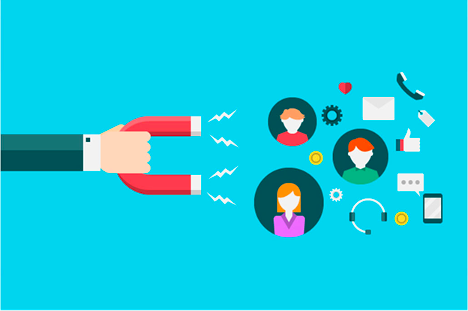

In [73]:
import pandas as pd
import numpy as np
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

import acquire_telco
import prepare
import prepare_telco
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>


# Evaluating Churn at Telco Co 

Introduction: The purpose of this project is to identify drivers of churn at TelcoCo. This task is accomplished by the following: 
- Acquiring the data from the CodeUp SQL database 
- Preparing the data 
- Exploring the data 
- Visualizing the data 
- Modeling the data

### Project Goals

- Find drivers for customer churn at Telco. Why are customers churning? 
- Construct a ML classification model that accurately predicts customer churn 
- Deliver a report that a non-data scientist can read through and understand what steps are taken, why and what was the outcome?

### Deliverables

- Readme: project description with goals, initial hypothesis and/or questions, data dictionary, project planning, instructions how someone else can reproduce your project and findings, key findings, recommendations, and takeaways from your project 

- Final Report: a report that has filtered out all the extraneous elements. Report must include four visualizations paired with questions. Report must also include at least two statistical tests.  

- Prediction CSV file- 3 columns: customer_id, probability of churn, and prediction of churn. 

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Acquire 

In [35]:
df = acquire_telco.get_telco_data()

Using cached csv


<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Prepare

Prepare.py:
- Drops duplicate columns: payment_type_id, internet_service_type_id, contract_type_id, customer_id
- Encodes: gender, partner, dependents, phone service, paperless billing, and churn 
- Creates dummy variables: multiple lines, online security, online backup, device protection, tech support, streaming tv, streaming movies, contract type, internet service type, payment type
- Concat dummy DataFrame to original DataFrame
- Strips total charges of white space
- Changes total charges datatype from object to float 
- Splits the data: train, validate, test


In [36]:
telco_df = prepare.prep_telco_data(df)

In [37]:
train, test, validate = telco_df

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Explore

### Questions: 
- What is the overall rate of churn 
- Do customers churn at different rates depending on their tenure? 
- Which features are the main drivers of churn?
- What can we observe about the relationship between customers with add on services and churn?

### Churn Rates

For the purpose of examining new customers separately from tenured customers, I split the train dataset.

In [20]:
def bin_tenure(tenure):
    if tenure <= 3: 
        return "brand_new"
    else: 
        return 'not_new'

In [21]:
train["tenure_bin"] = train.tenure.apply(bin_tenure)

In [22]:
new_customers = train[train.tenure_bin == "brand_new"]
old_customers = train[train.tenure_bin == "not_new"]

In [23]:
new_customers.churn.value_counts()

Yes    351
No     253
Name: churn, dtype: int64

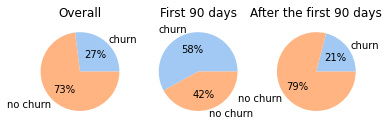

In [96]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

data1 = [27, 73]
labels = ['churn', 'no churn']
colors = sns.color_palette('pastel')[0:5]
ax1.pie(data1, labels = labels, colors = colors, autopct='%.0f%%')
ax1.set_title("Overall")

data2 = [58, 42]
labels2 = ['churn', 'no churn']
colors2 = sns.color_palette('pastel')[0:5]
ax2.pie(data2, labels = labels, colors = colors, autopct='%.0f%%')
ax2.set_title("First 90 days")


data3 = [21, 79]
labels3 = ['churn', 'no churn']
colors3 = sns.color_palette('pastel')[0:5]
ax3.pie(data3, labels = labels, colors = colors, autopct='%.0f%%')
ax3.set_title("After the first 90 days")
plt.show()

Takeaway: 
- ("overall") we see customers churned at a rate of 27%
- In the first 90 days customers churned at a rate of 58% 
- For customers who churn after the 90 days, as an average, the churn rate decreases to 21%

### Which features are the main drivers of churn? 

### Fiber Optic

<AxesSubplot:xlabel='internet_service_type'>

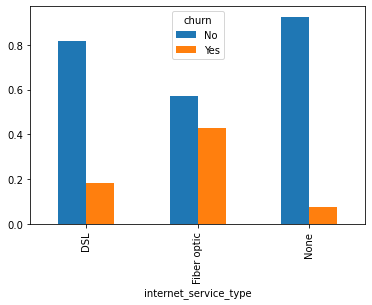

In [125]:
pd.crosstab(train.internet_service_type, train.churn, normalize="index").plot.bar()

Takeaway: 
- Fiber optic internet subscribers churn at a much higher rate than dsl customers

### Payment type Electronic Check 

<AxesSubplot:xlabel='payment_type'>

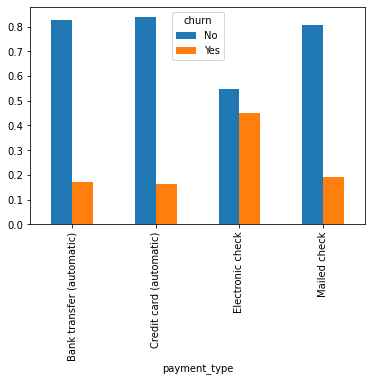

In [117]:
pd.crosstab(train.payment_type, train.churn, normalize="index").plot.bar()

Takeaway: 
- Customers who pay by electronic check churn at a much higher rate than any other payment type

### Senior Citizen

<AxesSubplot:xlabel='senior_citizen'>

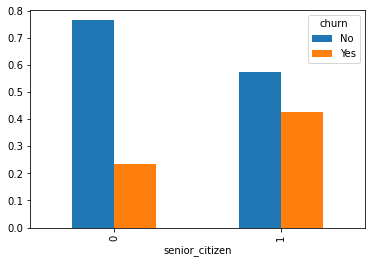

In [148]:
pd.crosstab(train.senior_citizen, train.churn, normalize="index").plot.bar()


Takeaway: 
- Senior citizens churn at a much higher rate than non senior citizens. 

### Can add on services reduce churn?

### Online Security

In [101]:
online_security_ctab = pd.crosstab(train.online_security, train.churn)
online_security_ctab

churn,No,Yes
online_security,,
No,1099,819
No internet service,803,64
Yes,989,163


Text(0.5, 1.0, 'No Online Security')

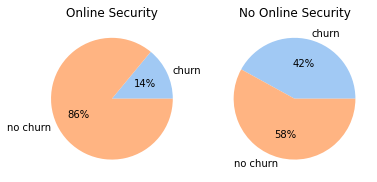

In [108]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

data1 = [14, 86]
labels = ['churn', 'no churn']
colors = sns.color_palette('pastel')[0:7]
ax1.pie(data1, labels = labels, colors = colors, autopct='%.0f%%')
ax1.set_title("Online Security")

data2 = [42, 58]
labels2 = ['churn', 'no churn']
colors2 = sns.color_palette('pastel')[0:7]
ax2.pie(data2, labels = labels, colors = colors, autopct='%.0f%%')
ax2.set_title("No Online Security")

Takeaway: 
- Customers with online security churn at a lower rate than customers with no online security

In [109]:
online_backup_ctab = pd.crosstab(train.online_backup, train.churn)
online_backup_ctab

churn,No,Yes
online_backup,,
No,1023,674
No internet service,803,64
Yes,1065,308


Text(0.5, 1.0, 'Online Backup')

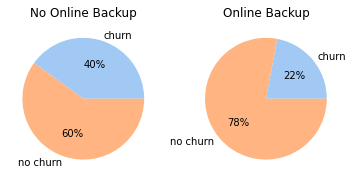

In [112]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

data1 = [40, 60]
labels = ['churn', 'no churn']
colors = sns.color_palette('pastel')[0:7]
ax1.pie(data1, labels = labels, colors = colors, autopct='%.0f%%')
ax1.set_title("No Online Backup")

data2 = [22, 78]
labels2 = ['churn', 'no churn']
colors2 = sns.color_palette('pastel')[0:7]
ax2.pie(data2, labels = labels, colors = colors, autopct='%.0f%%')
ax2.set_title("Online Backup")

Takeaway: 
- Customers with online backup churn at a lower rate than customers with no online backup

In [113]:
tech_support_ctab = pd.crosstab(train.tech_support, train.churn)
tech_support_ctab

churn,No,Yes
tech_support,,
No,1126,805
No internet service,803,64
Yes,962,177


Text(0.5, 1.0, 'Tech Support')

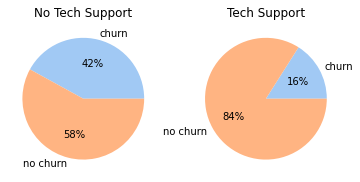

In [115]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

data1 = [42, 58]
labels = ['churn', 'no churn']
colors = sns.color_palette('pastel')[0:7]
ax1.pie(data1, labels = labels, colors = colors, autopct='%.0f%%')
ax1.set_title("No Tech Support")

data2 = [16, 84]
labels2 = ['churn', 'no churn']
colors2 = sns.color_palette('pastel')[0:7]
ax2.pie(data2, labels = labels, colors = colors, autopct='%.0f%%')
ax2.set_title("Tech Support")

Takeaway: 
- Customers with tech support churn at a lower rate than customers with no tech support

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Statistical Analysis

### Chi Square test for overall train set

In [127]:
alpha = 0.05

### Senior Citizen 

Initial Hypothesis: 
- H_0: Rate of churn is independent of being a senior citizen. 
- H_a: Rate of churn is not independent of being a senior citizen. 

In [150]:
senior_citizen_customer = pd.crosstab(train.senior_citizen, train.churn)
senior_citizen_customer

churn,No,Yes
senior_citizen,,
0,2527,775
1,364,271


In [151]:
chi2, senior, degf, expected_senior = stats.chi2_contingency(senior_citizen_customer)
print(expected_senior)
print(f"p-val: {senior}")

[[2424.70967742  877.29032258]
 [ 466.29032258  168.70967742]]
p-val: 1.7561315684822695e-23


In [152]:
if senior < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


### Fiber Optic 

Initial Hypothesis: 
- H_0: Rate of churn is independent of being a fiber optic internet subscriber. 
- H_a: Rate of churn is not independent of being a fiber optic internet subscriber. 

In [144]:
internet_customer = pd.crosstab(train["internet_service_type_Fiber optic"], train.churn)
internet_customer

churn,No,Yes
internet_service_type_Fiber optic,,
0,1904,311
1,987,735


In [145]:
chi2, fiber_optic, degf, expected_fiber_optic = stats.chi2_contingency(internet_customer)
print(expected_fiber_optic)
print(f"p-val: {fiber_optic}")

[[1626.50876302  588.49123698]
 [1264.49123698  457.50876302]]
p-val: 2.831419548361709e-90


In [146]:
if fiber_optic < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Modeling

### Create a Baseline

Because approximately 27% of customers churn, the baseline model is 1-0.27 = 0.73

The positive classifier is 1

### Split the Train into X_train, y_train

In [39]:
train.drop(columns=['gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn',
       'internet_service_type', 'contract_type', 'payment_type'], inplace=True)

In [42]:
validate.drop(columns=['gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn',
       'internet_service_type', 'contract_type', 'payment_type'], inplace=True)

In [43]:
test.drop(columns=['gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn',
       'internet_service_type', 'contract_type', 'payment_type'], inplace=True)

In [44]:
X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded

X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded

### Decision Trees

Max Depth 6

In [45]:
clf = DecisionTreeClassifier(max_depth=6, random_state=123)

In [46]:
clf = clf.fit(X_train, y_train)

In [47]:
y_pred = clf.predict(X_train)

In [48]:
y_pred_proba = clf.predict_proba(X_train)

In [49]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2891
           1       0.69      0.56      0.62      1046

    accuracy                           0.82      3937
   macro avg       0.77      0.74      0.75      3937
weighted avg       0.81      0.82      0.81      3937



In [51]:
print('Accuracy of decision trees classifier on test set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of decision trees classifier on test set: 0.79


Max Depth 7

In [52]:
clf = DecisionTreeClassifier(max_depth=7, random_state=123)

In [53]:
clf = clf.fit(X_train, y_train)

In [54]:
y_pred = clf.predict(X_train)

In [55]:
y_pred_proba = clf.predict_proba(X_train)

In [89]:
X_train.columns[clf.feature_importances_.argsort()[::-1]]

Index(['tenure', 'internet_service_type_Fiber optic', 'total_charges',
       'monthly_charges', 'contract_type_One year', 'contract_type_Two year',
       'online_security_No internet service', 'payment_type_Electronic check',
       'streaming_movies_Yes', 'online_backup_Yes',
       'paperless_billing_encoded', 'payment_type_Credit card (automatic)',
       'online_security_Yes', 'gender_encoded', 'dependents_encoded',
       'tech_support_Yes', 'payment_type_Mailed check',
       'phone_service_encoded', 'partner_encoded',
       'online_backup_No internet service', 'device_protection_Yes',
       'multiple_lines_Yes', 'multiple_lines_No phone service',
       'tech_support_No internet service', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'internet_service_type_None', 'device_protection_No internet service'],
      dtype='object')

In [56]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2891
           1       0.70      0.63      0.66      1046

    accuracy                           0.83      3937
   macro avg       0.78      0.76      0.77      3937
weighted avg       0.82      0.83      0.83      3937



In [57]:
print('Accuracy of decision trees classifier on test set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of decision trees classifier on test set: 0.78


### Random Forest 

In [58]:
af = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [60]:
af.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=123)

In [61]:
y_pred = af.predict(X_train)

In [62]:
y_pred_proba = af.predict_proba(X_train)

In [64]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(af.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.85


In [65]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2891
           1       0.79      0.62      0.69      1046

    accuracy                           0.85      3937
   macro avg       0.83      0.78      0.80      3937
weighted avg       0.85      0.85      0.85      3937



In [68]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(af.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.80


In [67]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(af.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.80


<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Prediction CSV File

In [74]:
df = acquire_telco.get_telco_data()

Using cached csv


In [75]:
telco_df = prepare_telco.prep_telco_data(df)

In [76]:
train, test, validate = telco_df

In [84]:
test['predictions'] = af.predict(X_test)

In [85]:
y_pred_proba = af.predict_proba(X_test)

In [86]:
test['probability'] = y_pred_proba[:, 1]

In [88]:
test.predictions.value_counts()

0    1323
1     365
Name: predictions, dtype: int64

In [140]:
predictions = test.filter(['customer_id', 'predictions', 'probability'])
predictions

,customer_id,predictions,probability
816,1194-HVAIF,0,0.423729
1488,2194-IIQOF,0,0.006167
4796,6738-ISCBM,0,0.216309
3213,4609-KNNWG,0,0.006000
5026,7064-JHXCE,0,0.000675
...,...,...,...
1234,1832-PEUTS,0,0.084497
1279,1899-VXWXM,0,0.242760
2281,3258-ZKPAI,0,0.029766
2536,3633-CDBUW,0,0.128164


In [142]:
predictions.to_csv("predictions.csv")

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Conclusion

### Customers who churn early (first 90 days) observations

Senior Citizens have a high risk of churning in the first 90 days

In [129]:
senior_citizen_customer = pd.crosstab(new_customers.senior_citizen, new_customers.churn)
senior_citizen_customer

churn,No,Yes
senior_citizen,,
0,240,271
1,13,80


Text(0.5, 1.0, 'Senior Citizen New Customers')

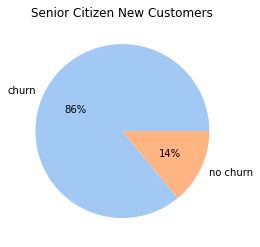

In [132]:
data1 = [86, 14]
labels = ['churn', 'no churn']
colors = sns.color_palette('pastel')[0:7]
plt.pie(data1, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Senior Citizen New Customers")

### Overall observations

The main drivers of churn are: fiber optic internet customers, customers who pay by Electronic check, and senior citizen customers

Add on services like online security, online backup, and tech support might support better customer retention

Monthly cost and total cost is also a driver of churn

Month to month customers churn at a higher rate than customers under contract

### If I had additional time I would have liked to: 

1. Combine high risk groups with add on services to compare the value of add on services to different subsets of the train dataset

2. Create a function that would produces multiple models: test over 1000 variations

3. Combine features and/or remove features to improve models